# Diabetes (clustering)

다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서
3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

## 1.sklearn을 이용하지 않고

In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

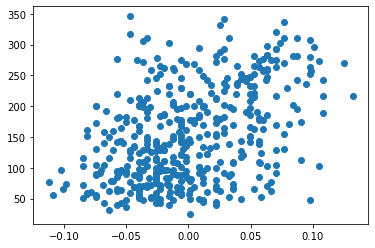

In [20]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,3] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,"o");

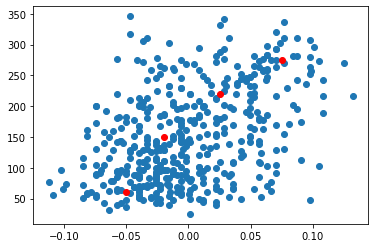

In [19]:
plt.scatter(X_p,X_d)
plt.plot([-0.05],[60],"ro")
plt.plot([-0.02],[150],"ro")
plt.plot([0.025],[220],"ro")
plt.plot([0.075],[275],"ro");

In [8]:
temp = []
for (i,j) in zip(X_p,X_d):
    r1=(i+0.05)**2 + (j-60)**2
    r2=(i+0.02)**2 + (j-150)**2
    r3=(i-0.025)**2 + (j-220)**2
    r4=(i-0.075)**2 + (j-275)**2
    m = min(r1,r2,r3,r4)  
    temp.append([r1,r2,r3,r4].index(m))

In [9]:
x1 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==0)])
x2 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==1)])
x3 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==2)])
x4 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==3)])
r1 = np.mean(x1[0]),np.mean(x1[1])
r2 = np.mean(x2[0]),np.mean(x2[1])
r3 = np.mean(x3[0]),np.mean(x3[1])
r4 = np.mean(x4[0]),np.mean(x4[1])

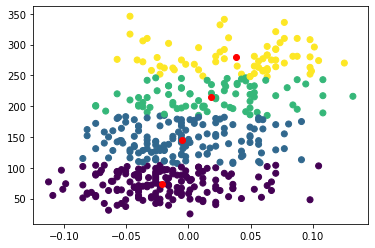

In [18]:
plt.scatter(X_p,X_d,c=temp)
plt.plot(r1[0],r1[1],'ro')
plt.plot(r2[0],r2[1],'ro')
plt.plot(r3[0],r3[1],'ro')
plt.plot(r4[0],r4[1],'ro');

## 2.sklearn을 이용해서

In [11]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters = 4)
X = [X_p,X_d]
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=4)

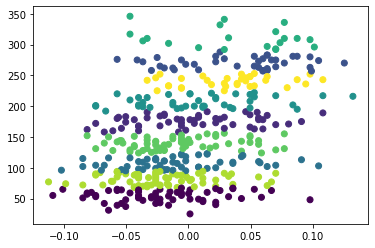

In [17]:
plt.scatter(X[0],X[1],c=kmeans.labels_);

## 3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

클러스터의 개수를 늘려가면서 SSE의 값이 급격하게 작아지는 부분이 최적의 클러스터의 개수가 된다

In [15]:
kiner = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

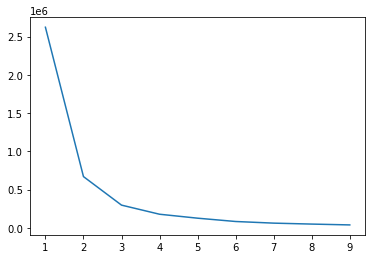

In [16]:
plt.plot(list(kiner.keys()), list(kiner.values()));

In [21]:
kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

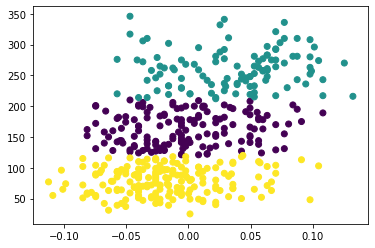

In [23]:
plt.scatter(X[0],X[1],c=kmeans.labels_);